----- PROJETO -------

purchases: https://6884d6b3745306380a3994e2.mockapi.io/purchases

usuarios: https://6884d6b3745306380a3994e2.mockapi.io/users

sells: https://6884d6b3745306380a3994e2.mockapi.io/sells

coins: https://6884d6b3745306380a3994e2.mockapi.io/coins 

** IDEIA PROJETO **

1. Precisa popular usando a API os dados. purchases, sells, coins.

2. Criar funcoes que integram os diferentes enderecos.

3. combinar usuarios com purchases
4. Combinar ususarios com sells

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

#Usando GET para requisitar a api
def get_users(): 
    req = requests.get('https://6884d6b3745306380a3994e2.mockapi.io/users')
    
    if req.status_code == 200:     #getUsers api
        return req.json()
    return {'Não foi possível se conectar com a api'}

def get_purchases(): 
    req = requests.get('https://6884d6b3745306380a3994e2.mockapi.io/purchases')

    if req.status_code == 200:      #getPurchases api
        return req.json()
    return {'Não foi possível se conectar com a api'}

def get_sells():
    req = requests.get('https://6884d6b3745306380a3994e2.mockapi.io/sells')

    if req.status_code == 200:      #getSells api
        return req.json()
    return {'Não foi possivel conect com a api'}

def get_coins():
    req = requests.get("https://6884d6b3745306380a3994e2.mockapi.io/coins")

    if req.status_code == 200:
        return req.json()
    return {"Não foi possivel conect com a api"}





In [ ]:
#Função para mudar o arquivo para csv
def json_to_csv(archive, data):
    df = pd.DataFrame(data)
    return df.to_csv(archive)


In [ ]:
user = get_users()
json_to_csv('users.csv', user)

In [ ]:
def create_purchases(coins_list):        
    url = "https://6884d6b3745306380a3994e2.mockapi.io/purchases"
    users = get_users()

    for i, user in enumerate(users[:46]):
        payload = {
            "price_purchase": 1000 + i * 200,
            "id_user": user['id'],
            "price_current": 1000 + i * 300,
            "id_coin": coins_list[i % len(coins_list)]
         }
        req = requests.post(url, json=payload)
        print(req.json())

def create_sells(coins_list):
    url = "https://6884d6b3745306380a3994e2.mockapi.io/sells"
    users = get_users()
   

    for i, user in enumerate(users[:46]):
        selling = {
            "id_user": user['id'],
            "id_coin": coins_list[i % len(coins_list)],
            "price_sell": 1500 + i * 500
        }
        req = requests.post(url, json=selling)
        print(req.json())

def create_coins(coins_list):
    url = "https://6884d6b3745306380a3994e2.mockapi.io/coins"

    for i, c in enumerate(coins_list[:6]):
        bitcoins = {
            "name": c,
            "current_price": 30000 + i * 5000 
        }
        req = requests.post(url, json=bitcoins)
        print(req.json())


In [ ]:

coins_list = ["bitcoin", "ethereum", "solana", "cardano", "dogecoin", "litecoin"]
create_purchases(coins_list)
# Populando usando POST

In [ ]:
# combinar usuarios com purchases
def combine_users_purchases():
    purchases = get_purchases()
    users = get_users()
    for p in purchases:
        for u in users:
            if p['id_user'] == u['id']:
                print(f"User: {u["name"]} made the purchase {p['price_purchase']}")


# Combinar usuarios com sells

def combine_users_sells():
    sells = get_sells()
    users = get_users()
    for s in sells:
        for u in users:
            if s["id_user"] == u['id']:
                print(f"User: {u['name']} made the sell of {s['price_sell']}")


In [ ]:
# Testando combinar usuarios com sells

combine_users_purchases()
combine_users_sells()

In [3]:
def user_sells(id_user):
    users = get_users()
    sells = get_sells()
    user = {}

    for i in users:
        if i['id'] == id_user:
            user = i
            break

    user['sells'] = []
    for i in sells:
        if i['id_user'] == user['id']:
            user['sells'].append(i)
    return user

def user_purchases(id_user):
    users = get_users()
    purchases = get_purchases()
    user = {}

    for i in users:
        if i['id'] == id_user:
            user = i
            break

    user['purchases'] = []
    for i in purchases:
        if i['id_user'] == user['id']:
            user['purchases'].append(i)
    return user




In [10]:
# user_purchases()
user_purchases('12')

{'createdAt': '2025-07-25T21:35:15.138Z',
 'name': 'Beth Kerluke',
 'id': '12',
 'purchases': [{'createdAt': '2025-07-28T09:32:45.703Z',
   'price_purchase': 6500,
   'id_user': '12',
   'price_current': 8700,
   'id_coin': 'litecoin',
   'id': '12'},
  {'createdAt': '2025-07-28T07:27:59.757Z',
   'price_purchase': '3000',
   'id_user': '12',
   'price_current': '6000',
   'id_coin': 'id_coin 47',
   'id': '47'},
  {'createdAt': '2025-07-30T06:12:45.146Z',
   'price_purchase': 6500,
   'id_user': '12',
   'price_current': 8700,
   'id_coin': 'litecoin',
   'id': '59'}]}

In [ ]:
def exibir_user_sells(id_user):
    user = user_sells(id_user)

    print(user['name'])
    for i in user['sells']:
        print(f"Actual price: {i['price_sell']}")

def exibir_user_purchases_sells(id_user):
    funcao_p = user_purchases(id_user)
    funcao_s = user_sells(id_user)

    print(funcao_p['name'])
    for i in funcao_p['purchases']:
        for x in funcao_s['sells']:
            print(f'Actual purchase price: {i['price_purchase']} | Actual price sell: {x["price_sell"]}')


In [ ]:
exibir_user_purchases_sells('12')

In [ ]:
def calcular_purchase(id_user):
    user = user_purchases(id_user)
    purchases = user['purchases']
    number_return = 0
    for i in purchases:
        number_return += float(i['price_purchase'])
    return {
        'id_user': id_user,
        'name': user['name'],
        'total_purchases': number_return
    }

def calcular_sells(id_user):
    user = user_sells(id_user)
    sells = user['sells']
    number_return = 0
    for i in sells:
        number_return += float(i['price_sell'])
    return {
        'id_user': id_user,
        'name': user['name'],
        'total_sells' : number_return,
    }

def executar_saldo_liquido(id_user): 
   user = user_sells(id_user)
   cal_purchases = calcular_purchase(id_user)
   cal_sells = calcular_sells(id_user)
   total_liquido = cal_purchases['total_purchases'] - cal_sells['total_sells']
   return {
           'id_user': id_user,
           'name': user['name'],
           'total_liquido': total_liquido,
       }


In [ ]:
executar_saldo_liquido('2')

In [4]:
def return_array_number(id_user):
    purchase = user_purchases(id_user)['purchases']
    array = []
    
    
    for i in purchase:
        array.append(int(i['price_purchase']))
    return array

def grafico_qtd_purchase(id_user):
    a = return_array_number(id_user)
    b = []

    for i in range(len(a)):
        b.append(f'{i + 1} compras')

    x = np.array(b)
    y = np.array(a)

    plt.bar(x, y)
    plt.show()

    

In [ ]:
grafico_qtd_purchase('11')

In [ ]:
def return_array_number_sell(id_user):
    sells = user_sells(id_user)['sells']
    array = []

    for i in sells:
        array.append(int(i['price_sell']))
    return array

def grafico_qtd_sell(id_user):
    a = return_array_number_sell(id_user)
    b = []

    for i in range(len(a)):
        b.append(f"{i + 1} venda")
    
    x = np.array(b)
    y = np.array(a)

    plt.bar(x, y)
    plt.show()


In [ ]:
grafico_qtd_sell('12')

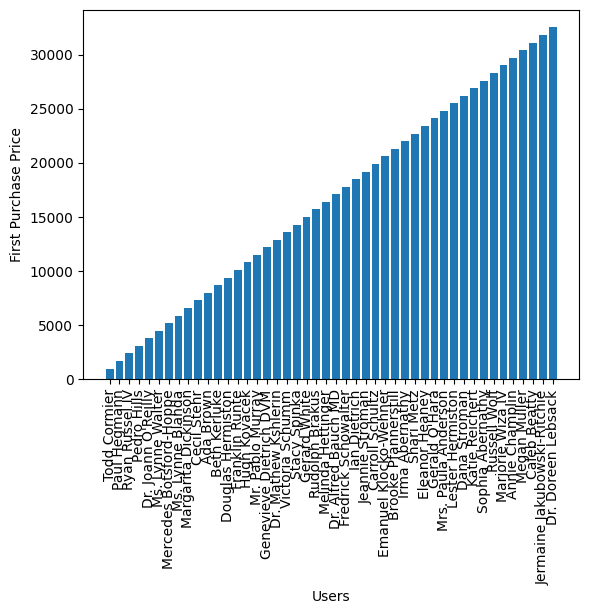

In [31]:
def grafico_first_purchase():
    names = []
    first_purchases = []

    for i in range(1, 47):
        user = user_purchases(str(i))
        names.append(user['name'])
        first_purchases.append(user['purchases'][0]['price_current'])

    x = np.array(names)
    y = np.array(first_purchases)

    plt.bar(x, y)
    plt.xlabel('Users')
    plt.ylabel('First Purchase Price')
    plt.xticks(rotation=90)
    plt.show()
grafico_first_purchase()